# Converting a binary mask to a shapefile
## Developement version

This notebook illustrates the conversion of a (segmentation result) binary mask to a shapefile. The example is using a 2006 QuickBird image of Kalyan, India and the binary mask of the slum ground truth.

## Load the mask from disk

Python package imports:

In [7]:
# import
import os
from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import pprint
import rasterio as ras
from rasterio.features import shapes as sh
from satsense.util import load_from_file

Path and filenames:

In [2]:
# data path
MASK_PATH = '/home/elena/DynaSlum/Data/Kalyan/Rasterized_Lourens/'

# mask filename
ext = 'tif'
truth_slum_mask_fname = 'all_slums' + '.' + ext

# mask full filename
truth_slum_mask_fullfname = os.path.join(MASK_PATH, truth_slum_mask_fname)

Load the mask onto a numpy array:

In [3]:
_, truth_slum_mask = load_from_file(truth_slum_mask_fullfname)
print("Truth slum mask shape: ", truth_slum_mask.shape)

Truth slum mask shape:  (6223, 4872, 1)


Squeeze the unnecessary 3rd empty dimension

In [4]:
truth_slum_mask = np.squeeze(truth_slum_mask)
print("Truth slum mask shape: ", truth_slum_mask.shape)

Truth slum mask shape:  (6223, 4872)


Print some slum mask values and visualize it:

Truth slum mask values [20:60,1420:1460]: 
[[   0.    0.    0. ...,    0.    0.    0.]
 [   0.    0.    0. ...,    0.    0.    0.]
 [   0.    0.    0. ...,    0.    0.    0.]
 ..., 
 [ 255.  255.  255. ...,  255.  255.  255.]
 [ 255.  255.  255. ...,  255.  255.  255.]
 [ 255.  255.  255. ...,  255.  255.  255.]]


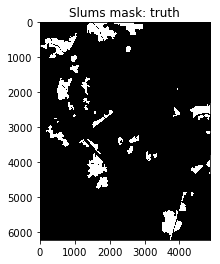

In [5]:
print("Truth slum mask values [20:60,1420:1460]: ")
print(truth_slum_mask[20:60,1420:1460])
#f = plt.subplots(1, 1)
plt.imshow(truth_slum_mask, cmap='gray')
plt.title('Slums mask: truth')

Use rasterio toprint properties:

In [6]:
with ras.drivers():
    with ras.open(truth_slum_mask_fullfname) as src:
        slum_mask = src.read(1)
        print(src.width, src.height)
        print(src.crs)
        print(src.affine)
        print(src.count)
        print(src.indexes)

4872 6223
CRS({})
| 1.00, 0.00, 0.00|
| 0.00, 1.00, 0.00|
| 0.00, 0.00, 1.00|
1
(1,)


/home/elena/anaconda3/envs/satelite/lib/python3.5/site-packages/rasterio/__init__.py:193: UserWarning: Dataset has no geotransform set.  Default transform will be applied (Affine.identity())
  s.start()


The list of features:

In [9]:
for shape, value in sh(slum_mask):
    print("Image value:")
    print(value)
    print("Geometry:")
    pprint.pprint(shape)

Image value:
255.0
Geometry:
{'coordinates': [[(2100.0, 0.0),
                  (2100.0, 4.0),
                  (2101.0, 4.0),
                  (2101.0, 10.0),
                  (2102.0, 10.0),
                  (2102.0, 16.0),
                  (2103.0, 16.0),
                  (2103.0, 22.0),
                  (2104.0, 22.0),
                  (2104.0, 28.0),
                  (2105.0, 28.0),
                  (2105.0, 34.0),
                  (2106.0, 34.0),
                  (2106.0, 40.0),
                  (2107.0, 40.0),
                  (2107.0, 46.0),
                  (2108.0, 46.0),
                  (2108.0, 52.0),
                  (2109.0, 52.0),
                  (2109.0, 58.0),
                  (2110.0, 58.0),
                  (2110.0, 64.0),
                  (2111.0, 64.0),
                  (2111.0, 70.0),
                  (2112.0, 70.0),
                  (2112.0, 72.0),
                  (2118.0, 72.0),
                  (2118.0, 71.0),
                  (213

                  (1645.0, 146.0),
                  (1646.0, 146.0),
                  (1646.0, 148.0),
                  (1647.0, 148.0),
                  (1647.0, 149.0),
                  (1648.0, 149.0),
                  (1648.0, 151.0),
                  (1649.0, 151.0),
                  (1649.0, 152.0),
                  (1650.0, 152.0),
                  (1650.0, 153.0),
                  (1651.0, 153.0),
                  (1651.0, 155.0),
                  (1652.0, 155.0),
                  (1652.0, 156.0),
                  (1653.0, 156.0),
                  (1653.0, 158.0),
                  (1654.0, 158.0),
                  (1654.0, 159.0),
                  (1655.0, 159.0),
                  (1655.0, 160.0),
                  (1656.0, 160.0),
                  (1656.0, 162.0),
                  (1657.0, 162.0),
                  (1657.0, 163.0),
                  (1658.0, 163.0),
                  (1658.0, 165.0),
                  (1659.0, 165.0),
                  (1

                  (1790.0, 103.0),
                  (1789.0, 103.0),
                  (1789.0, 99.0),
                  (1788.0, 99.0),
                  (1788.0, 95.0),
                  (1787.0, 95.0),
                  (1787.0, 92.0),
                  (1786.0, 92.0),
                  (1786.0, 87.0),
                  (1787.0, 87.0),
                  (1788.0, 87.0),
                  (1788.0, 86.0),
                  (1790.0, 86.0),
                  (1791.0, 86.0),
                  (1791.0, 85.0),
                  (1792.0, 85.0),
                  (1793.0, 85.0),
                  (1793.0, 84.0),
                  (1794.0, 84.0),
                  (1795.0, 84.0),
                  (1795.0, 83.0),
                  (1797.0, 83.0),
                  (1798.0, 83.0),
                  (1798.0, 82.0),
                  (1799.0, 82.0),
                  (1800.0, 82.0),
                  (1800.0, 81.0),
                  (1801.0, 81.0),
                  (1802.0, 81.0),
            

                  (985.0, 339.0),
                  (996.0, 339.0),
                  (996.0, 396.0),
                  (995.0, 396.0),
                  (994.0, 396.0),
                  (994.0, 397.0),
                  (993.0, 397.0),
                  (992.0, 397.0),
                  (992.0, 398.0),
                  (991.0, 398.0),
                  (990.0, 398.0),
                  (990.0, 399.0),
                  (989.0, 399.0),
                  (988.0, 399.0),
                  (988.0, 400.0),
                  (987.0, 400.0),
                  (985.0, 400.0),
                  (985.0, 401.0),
                  (984.0, 401.0),
                  (983.0, 401.0),
                  (983.0, 402.0),
                  (982.0, 402.0),
                  (981.0, 402.0),
                  (981.0, 403.0),
                  (980.0, 403.0),
                  (978.0, 403.0),
                  (978.0, 404.0),
                  (977.0, 404.0),
                  (976.0, 404.0),
              

                  (200.0, 619.0),
                  (200.0, 620.0),
                  (202.0, 620.0),
                  (202.0, 621.0),
                  (205.0, 621.0),
                  (205.0, 622.0),
                  (206.0, 622.0),
                  (206.0, 623.0),
                  (207.0, 623.0),
                  (207.0, 622.0),
                  (209.0, 622.0),
                  (210.0, 622.0),
                  (210.0, 621.0),
                  (211.0, 621.0),
                  (212.0, 621.0),
                  (212.0, 620.0),
                  (214.0, 620.0),
                  (215.0, 620.0),
                  (215.0, 619.0),
                  (216.0, 619.0),
                  (217.0, 619.0),
                  (217.0, 618.0),
                  (218.0, 618.0),
                  (219.0, 618.0),
                  (219.0, 617.0),
                  (221.0, 617.0),
                  (222.0, 617.0),
                  (222.0, 616.0),
                  (223.0, 616.0),
              

                  (946.0, 1255.0),
                  (946.0, 1254.0),
                  (944.0, 1254.0),
                  (944.0, 1253.0),
                  (943.0, 1253.0),
                  (943.0, 1252.0),
                  (942.0, 1252.0),
                  (942.0, 1250.0),
                  (941.0, 1250.0),
                  (941.0, 1249.0),
                  (940.0, 1249.0),
                  (940.0, 1247.0),
                  (939.0, 1247.0),
                  (939.0, 1246.0),
                  (938.0, 1246.0),
                  (938.0, 1244.0),
                  (937.0, 1244.0),
                  (937.0, 1243.0),
                  (936.0, 1243.0),
                  (936.0, 1242.0),
                  (935.0, 1242.0),
                  (935.0, 1240.0),
                  (934.0, 1240.0),
                  (934.0, 1239.0),
                  (933.0, 1239.0),
                  (933.0, 1237.0),
                  (932.0, 1237.0),
                  (932.0, 1236.0),
                  (9

                  (1265.0, 1702.0),
                  (1265.0, 1703.0),
                  (1264.0, 1703.0),
                  (1264.0, 1704.0),
                  (1263.0, 1704.0),
                  (1263.0, 1705.0),
                  (1262.0, 1705.0),
                  (1262.0, 1706.0),
                  (1261.0, 1706.0),
                  (1261.0, 1707.0),
                  (1260.0, 1707.0),
                  (1260.0, 1708.0),
                  (1259.0, 1708.0),
                  (1259.0, 1709.0),
                  (1258.0, 1709.0),
                  (1258.0, 1710.0),
                  (1257.0, 1710.0),
                  (1256.0, 1710.0),
                  (1256.0, 1711.0),
                  (1255.0, 1711.0),
                  (1253.0, 1711.0),
                  (1253.0, 1712.0),
                  (1252.0, 1712.0),
                  (1250.0, 1712.0),
                  (1250.0, 1713.0),
                  (1249.0, 1713.0),
                  (1247.0, 1713.0),
                  (1247.0, 1

                  (660.0, 1835.0),
                  (660.0, 1834.0),
                  (659.0, 1834.0),
                  (659.0, 1833.0),
                  (657.0, 1833.0),
                  (657.0, 1832.0),
                  (656.0, 1832.0),
                  (656.0, 1831.0),
                  (654.0, 1831.0),
                  (654.0, 1830.0),
                  (653.0, 1830.0),
                  (653.0, 1829.0),
                  (651.0, 1829.0),
                  (651.0, 1828.0),
                  (650.0, 1828.0),
                  (650.0, 1827.0),
                  (648.0, 1827.0),
                  (648.0, 1826.0),
                  (647.0, 1826.0),
                  (647.0, 1825.0),
                  (645.0, 1825.0),
                  (645.0, 1824.0),
                  (644.0, 1824.0),
                  (644.0, 1823.0),
                  (642.0, 1823.0),
                  (642.0, 1822.0),
                  (641.0, 1822.0),
                  (641.0, 1821.0),
                  (6

                  (3812.0, 2661.0),
                  (3811.0, 2661.0),
                  (3811.0, 2662.0),
                  (3810.0, 2662.0),
                  (3809.0, 2662.0),
                  (3809.0, 2663.0),
                  (3808.0, 2663.0),
                  (3807.0, 2663.0),
                  (3807.0, 2664.0),
                  (3806.0, 2664.0),
                  (3805.0, 2664.0),
                  (3805.0, 2665.0),
                  (3804.0, 2665.0),
                  (3803.0, 2665.0),
                  (3803.0, 2666.0),
                  (3802.0, 2666.0),
                  (3801.0, 2666.0),
                  (3801.0, 2667.0),
                  (3800.0, 2667.0),
                  (3799.0, 2667.0),
                  (3799.0, 2668.0),
                  (3798.0, 2668.0),
                  (3797.0, 2668.0),
                  (3797.0, 2669.0),
                  (3796.0, 2669.0),
                  (3795.0, 2669.0),
                  (3795.0, 2670.0),
                  (3794.0, 2

                  (4820.0, 2613.0),
                  (4822.0, 2613.0),
                  (4822.0, 2614.0),
                  (4824.0, 2614.0),
                  (4824.0, 2615.0),
                  (4826.0, 2615.0),
                  (4826.0, 2616.0),
                  (4829.0, 2616.0),
                  (4829.0, 2617.0),
                  (4831.0, 2617.0),
                  (4831.0, 2618.0),
                  (4833.0, 2618.0),
                  (4833.0, 2619.0),
                  (4835.0, 2619.0),
                  (4835.0, 2620.0),
                  (4838.0, 2620.0),
                  (4838.0, 2621.0),
                  (4840.0, 2621.0),
                  (4840.0, 2622.0),
                  (4842.0, 2622.0),
                  (4842.0, 2623.0),
                  (4844.0, 2623.0),
                  (4844.0, 2624.0),
                  (4847.0, 2624.0),
                  (4847.0, 2625.0),
                  (4849.0, 2625.0),
                  (4849.0, 2626.0),
                  (4851.0, 2

                  (1827.0, 2688.0),
                  (1827.0, 2689.0),
                  (1828.0, 2689.0),
                  (1828.0, 2691.0),
                  (1829.0, 2691.0),
                  (1829.0, 2692.0),
                  (1830.0, 2692.0),
                  (1830.0, 2694.0),
                  (1831.0, 2694.0),
                  (1831.0, 2695.0),
                  (1832.0, 2695.0),
                  (1832.0, 2697.0),
                  (1833.0, 2697.0),
                  (1833.0, 2699.0),
                  (1834.0, 2699.0),
                  (1834.0, 2700.0),
                  (1835.0, 2700.0),
                  (1835.0, 2702.0),
                  (1836.0, 2702.0),
                  (1836.0, 2704.0),
                  (1837.0, 2704.0),
                  (1837.0, 2705.0),
                  (1838.0, 2705.0),
                  (1838.0, 2707.0),
                  (1839.0, 2707.0),
                  (1839.0, 2709.0),
                  (1840.0, 2709.0),
                  (1840.0, 2

                  (2032.0, 2628.0),
                  (2033.0, 2628.0),
                  (2033.0, 2627.0),
                  (2034.0, 2627.0),
                  (2034.0, 2626.0),
                  (2035.0, 2626.0),
                  (2035.0, 2625.0),
                  (2036.0, 2625.0),
                  (2037.0, 2625.0),
                  (2037.0, 2624.0),
                  (2038.0, 2624.0),
                  (2038.0, 2623.0),
                  (2039.0, 2623.0),
                  (2039.0, 2622.0),
                  (2040.0, 2622.0),
                  (2041.0, 2622.0),
                  (2041.0, 2621.0),
                  (2042.0, 2621.0),
                  (2042.0, 2620.0),
                  (2043.0, 2620.0),
                  (2044.0, 2620.0),
                  (2044.0, 2619.0),
                  (2045.0, 2619.0),
                  (2045.0, 2618.0),
                  (2046.0, 2618.0),
                  (2046.0, 2617.0),
                  (2047.0, 2617.0),
                  (2048.0, 2

                  (2328.0, 3374.0),
                  (2328.0, 3373.0),
                  (2329.0, 3373.0),
                  (2330.0, 3373.0),
                  (2330.0, 3372.0),
                  (2336.0, 3372.0),
                  (2337.0, 3372.0),
                  (2337.0, 3371.0),
                  (2340.0, 3371.0),
                  (2340.0, 3372.0),
                  (2342.0, 3372.0),
                  (2342.0, 3373.0),
                  (2343.0, 3373.0),
                  (2343.0, 3374.0),
                  (2344.0, 3374.0),
                  (2344.0, 3375.0),
                  (2346.0, 3375.0),
                  (2346.0, 3376.0),
                  (2347.0, 3376.0),
                  (2347.0, 3377.0),
                  (2348.0, 3377.0),
                  (2348.0, 3379.0),
                  (2349.0, 3379.0),
                  (2349.0, 3380.0),
                  (2350.0, 3380.0),
                  (2350.0, 3388.0),
                  (2349.0, 3388.0),
                  (2349.0, 3

                  (261.0, 3163.0),
                  (261.0, 3164.0),
                  (263.0, 3164.0),
                  (263.0, 3165.0),
                  (266.0, 3165.0),
                  (266.0, 3166.0),
                  (267.0, 3166.0),
                  (267.0, 3167.0),
                  (268.0, 3167.0),
                  (268.0, 3168.0),
                  (270.0, 3168.0),
                  (270.0, 3169.0),
                  (271.0, 3169.0),
                  (271.0, 3170.0),
                  (273.0, 3170.0),
                  (273.0, 3172.0),
                  (275.0, 3172.0),
                  (275.0, 3173.0),
                  (276.0, 3173.0),
                  (276.0, 3174.0),
                  (277.0, 3174.0),
                  (277.0, 3175.0),
                  (278.0, 3175.0),
                  (278.0, 3176.0),
                  (279.0, 3176.0),
                  (279.0, 3177.0),
                  (280.0, 3177.0),
                  (280.0, 3179.0),
                  (2

                  (520.0, 3181.0),
                  (519.0, 3181.0),
                  (518.0, 3181.0),
                  (518.0, 3182.0),
                  (517.0, 3182.0),
                  (514.0, 3182.0),
                  (514.0, 3183.0),
                  (513.0, 3183.0),
                  (513.0, 3184.0),
                  (512.0, 3184.0),
                  (511.0, 3184.0),
                  (511.0, 3185.0),
                  (510.0, 3185.0),
                  (509.0, 3185.0),
                  (509.0, 3186.0),
                  (497.0, 3186.0),
                  (497.0, 3185.0),
                  (496.0, 3185.0),
                  (496.0, 3184.0),
                  (494.0, 3184.0),
                  (494.0, 3183.0),
                  (491.0, 3183.0),
                  (491.0, 3182.0),
                  (489.0, 3182.0),
                  (489.0, 3181.0),
                  (452.0, 3181.0),
                  (452.0, 3182.0),
                  (451.0, 3182.0),
                  (4

                  (2634.0, 3679.0),
                  (2634.0, 3678.0),
                  (2635.0, 3678.0),
                  (2635.0, 3676.0),
                  (2636.0, 3676.0),
                  (2636.0, 3675.0),
                  (2637.0, 3675.0),
                  (2637.0, 3672.0),
                  (2638.0, 3672.0),
                  (2638.0, 3667.0),
                  (2639.0, 3667.0),
                  (2639.0, 3653.0),
                  (2640.0, 3653.0),
                  (2640.0, 3646.0),
                  (2641.0, 3646.0),
                  (2641.0, 3623.0),
                  (2642.0, 3623.0),
                  (2642.0, 3617.0),
                  (2643.0, 3617.0),
                  (2643.0, 3616.0),
                  (2642.0, 3616.0),
                  (2642.0, 3611.0),
                  (2643.0, 3611.0),
                  (2643.0, 3600.0),
                  (2644.0, 3600.0),
                  (2644.0, 3597.0),
                  (2645.0, 3597.0),
                  (2645.0, 3

                  (1435.0, 3956.0),
                  (1434.0, 3956.0),
                  (1434.0, 3957.0),
                  (1433.0, 3957.0),
                  (1432.0, 3957.0),
                  (1432.0, 3958.0),
                  (1431.0, 3958.0),
                  (1430.0, 3958.0),
                  (1430.0, 3959.0),
                  (1429.0, 3959.0),
                  (1428.0, 3959.0),
                  (1428.0, 3960.0),
                  (1427.0, 3960.0),
                  (1426.0, 3960.0),
                  (1426.0, 3961.0),
                  (1425.0, 3961.0),
                  (1424.0, 3961.0),
                  (1424.0, 3962.0),
                  (1423.0, 3962.0),
                  (1422.0, 3962.0),
                  (1422.0, 3963.0),
                  (1421.0, 3963.0),
                  (1420.0, 3963.0),
                  (1420.0, 3964.0),
                  (1417.0, 3964.0),
                  (1417.0, 3961.0),
                  (1416.0, 3961.0),
                  (1416.0, 3

                  (4363.0, 4270.0),
                  (4363.0, 4271.0),
                  (4364.0, 4271.0),
                  (4364.0, 4272.0),
                  (4366.0, 4272.0),
                  (4366.0, 4273.0),
                  (4368.0, 4273.0),
                  (4368.0, 4274.0),
                  (4369.0, 4274.0),
                  (4369.0, 4275.0),
                  (4370.0, 4275.0),
                  (4370.0, 4276.0),
                  (4372.0, 4276.0),
                  (4372.0, 4277.0),
                  (4373.0, 4277.0),
                  (4373.0, 4278.0),
                  (4375.0, 4278.0),
                  (4375.0, 4280.0),
                  (4376.0, 4280.0),
                  (4376.0, 4281.0),
                  (4377.0, 4281.0),
                  (4377.0, 4282.0),
                  (4378.0, 4282.0),
                  (4378.0, 4283.0),
                  (4379.0, 4283.0),
                  (4379.0, 4284.0),
                  (4380.0, 4284.0),
                  (4380.0, 4

                  (1378.0, 4278.0),
                  (1381.0, 4278.0),
                  (1381.0, 4279.0),
                  (1385.0, 4279.0),
                  (1385.0, 4280.0),
                  (1389.0, 4280.0),
                  (1389.0, 4281.0),
                  (1392.0, 4281.0),
                  (1392.0, 4282.0),
                  (1396.0, 4282.0),
                  (1396.0, 4283.0),
                  (1400.0, 4283.0),
                  (1400.0, 4284.0),
                  (1404.0, 4284.0),
                  (1404.0, 4285.0),
                  (1408.0, 4285.0),
                  (1408.0, 4286.0),
                  (1412.0, 4286.0),
                  (1412.0, 4287.0),
                  (1416.0, 4287.0),
                  (1416.0, 4288.0),
                  (1420.0, 4288.0),
                  (1420.0, 4289.0),
                  (1424.0, 4289.0),
                  (1424.0, 4290.0),
                  (1426.0, 4290.0),
                  (1426.0, 4292.0),
                  (1425.0, 4

                  (4354.0, 4859.0),
                  (4353.0, 4859.0),
                  (4353.0, 4858.0),
                  (4352.0, 4858.0),
                  (4352.0, 4857.0),
                  (4350.0, 4857.0),
                  (4350.0, 4856.0),
                  (4349.0, 4856.0),
                  (4349.0, 4855.0),
                  (4348.0, 4855.0),
                  (4348.0, 4854.0),
                  (4347.0, 4854.0),
                  (4347.0, 4853.0),
                  (4345.0, 4853.0),
                  (4345.0, 4852.0),
                  (4344.0, 4852.0),
                  (4344.0, 4851.0),
                  (4343.0, 4851.0),
                  (4343.0, 4850.0),
                  (4342.0, 4850.0),
                  (4342.0, 4849.0),
                  (4340.0, 4849.0),
                  (4340.0, 4847.0),
                  (4338.0, 4847.0),
                  (4338.0, 4846.0),
                  (4337.0, 4846.0),
                  (4337.0, 4845.0),
                  (4336.0, 4

                  (3878.0, 5969.0),
                  (3878.0, 5968.0),
                  (3879.0, 5968.0),
                  (3880.0, 5968.0),
                  (3880.0, 5967.0),
                  (3881.0, 5967.0),
                  (3882.0, 5967.0),
                  (3882.0, 5966.0),
                  (3884.0, 5966.0),
                  (3885.0, 5966.0),
                  (3885.0, 5965.0),
                  (3886.0, 5965.0),
                  (3887.0, 5965.0),
                  (3887.0, 5964.0),
                  (3888.0, 5964.0),
                  (3889.0, 5964.0),
                  (3889.0, 5963.0),
                  (3890.0, 5963.0),
                  (3891.0, 5963.0),
                  (3891.0, 5962.0),
                  (3893.0, 5962.0),
                  (3894.0, 5962.0),
                  (3894.0, 5961.0),
                  (3895.0, 5961.0),
                  (3896.0, 5961.0),
                  (3896.0, 5960.0),
                  (3897.0, 5960.0),
                  (3898.0, 5

                  (3894.0, 5601.0),
                  (3894.0, 5597.0),
                  (3895.0, 5597.0),
                  (3895.0, 5593.0),
                  (3896.0, 5593.0),
                  (3896.0, 5589.0),
                  (3897.0, 5589.0),
                  (3897.0, 5585.0),
                  (3898.0, 5585.0),
                  (3898.0, 5581.0),
                  (3899.0, 5581.0),
                  (3899.0, 5577.0),
                  (3900.0, 5577.0),
                  (3900.0, 5573.0),
                  (3901.0, 5573.0),
                  (3901.0, 5569.0),
                  (3902.0, 5569.0),
                  (3902.0, 5565.0),
                  (3903.0, 5565.0),
                  (3903.0, 5561.0),
                  (3904.0, 5561.0),
                  (3904.0, 5557.0),
                  (3905.0, 5557.0),
                  (3905.0, 5553.0),
                  (3906.0, 5553.0),
                  (3906.0, 5549.0),
                  (3907.0, 5549.0),
                  (3907.0, 5

{'coordinates': [[(0.0, 0.0),
                  (0.0, 667.0),
                  (1.0, 667.0),
                  (1.0, 665.0),
                  (2.0, 665.0),
                  (2.0, 662.0),
                  (3.0, 662.0),
                  (3.0, 660.0),
                  (4.0, 660.0),
                  (4.0, 657.0),
                  (5.0, 657.0),
                  (5.0, 655.0),
                  (6.0, 655.0),
                  (6.0, 652.0),
                  (7.0, 652.0),
                  (7.0, 651.0),
                  (9.0, 651.0),
                  (9.0, 652.0),
                  (12.0, 652.0),
                  (12.0, 653.0),
                  (15.0, 653.0),
                  (15.0, 654.0),
                  (18.0, 654.0),
                  (18.0, 655.0),
                  (22.0, 655.0),
                  (22.0, 654.0),
                  (23.0, 654.0),
                  (23.0, 652.0),
                  (25.0, 652.0),
                  (25.0, 653.0),
                  (28.0, 653.0

                  (3708.0, 6167.0),
                  (3708.0, 6163.0),
                  (3709.0, 6163.0),
                  (3709.0, 6158.0),
                  (3710.0, 6158.0),
                  (3710.0, 6154.0),
                  (3711.0, 6154.0),
                  (3711.0, 6150.0),
                  (3712.0, 6150.0),
                  (3712.0, 6146.0),
                  (3713.0, 6146.0),
                  (3713.0, 6142.0),
                  (3714.0, 6142.0),
                  (3714.0, 6138.0),
                  (3715.0, 6138.0),
                  (3715.0, 6134.0),
                  (3716.0, 6134.0),
                  (3716.0, 6129.0),
                  (3717.0, 6129.0),
                  (3717.0, 6125.0),
                  (3718.0, 6125.0),
                  (3718.0, 6121.0),
                  (3719.0, 6121.0),
                  (3719.0, 6117.0),
                  (3720.0, 6117.0),
                  (3720.0, 6113.0),
                  (3721.0, 6113.0),
                  (3721.0, 6

                  (4842.0, 4166.0),
                  (4841.0, 4166.0),
                  (4841.0, 4165.0),
                  (4840.0, 4165.0),
                  (4840.0, 4164.0),
                  (4839.0, 4164.0),
                  (4839.0, 4163.0),
                  (4838.0, 4163.0),
                  (4838.0, 4162.0),
                  (4837.0, 4162.0),
                  (4837.0, 4161.0),
                  (4836.0, 4161.0),
                  (4836.0, 4160.0),
                  (4835.0, 4160.0),
                  (4835.0, 4158.0),
                  (4836.0, 4158.0),
                  (4836.0, 4156.0),
                  (4837.0, 4156.0),
                  (4837.0, 4154.0),
                  (4838.0, 4154.0),
                  (4838.0, 4151.0),
                  (4839.0, 4151.0),
                  (4839.0, 4147.0),
                  (4838.0, 4147.0),
                  (4838.0, 4146.0),
                  (4837.0, 4146.0),
                  (4837.0, 4145.0),
                  (4836.0, 4

                  (4407.0, 2415.0),
                  (4407.0, 2414.0),
                  (4408.0, 2414.0),
                  (4408.0, 2413.0),
                  (4409.0, 2413.0),
                  (4409.0, 2412.0),
                  (4410.0, 2412.0),
                  (4410.0, 2411.0),
                  (4412.0, 2411.0),
                  (4413.0, 2411.0),
                  (4413.0, 2410.0),
                  (4415.0, 2410.0),
                  (4416.0, 2410.0),
                  (4416.0, 2409.0),
                  (4417.0, 2409.0),
                  (4418.0, 2409.0),
                  (4418.0, 2408.0),
                  (4420.0, 2408.0),
                  (4421.0, 2408.0),
                  (4421.0, 2407.0),
                  (4423.0, 2407.0),
                  (4424.0, 2407.0),
                  (4424.0, 2406.0),
                  (4425.0, 2406.0),
                  (4426.0, 2406.0),
                  (4426.0, 2405.0),
                  (4428.0, 2405.0),
                  (4429.0, 2

                  (1800.0, 465.0),
                  (1800.0, 462.0),
                  (1799.0, 462.0),
                  (1799.0, 460.0),
                  (1798.0, 460.0),
                  (1798.0, 459.0),
                  (1797.0, 459.0),
                  (1797.0, 458.0),
                  (1796.0, 458.0),
                  (1796.0, 457.0),
                  (1795.0, 457.0),
                  (1795.0, 456.0),
                  (1794.0, 456.0),
                  (1794.0, 455.0),
                  (1793.0, 455.0),
                  (1793.0, 453.0),
                  (1792.0, 453.0),
                  (1792.0, 452.0),
                  (1791.0, 452.0),
                  (1791.0, 451.0),
                  (1790.0, 451.0),
                  (1790.0, 450.0),
                  (1789.0, 450.0),
                  (1789.0, 449.0),
                  (1788.0, 449.0),
                  (1788.0, 448.0),
                  (1787.0, 448.0),
                  (1787.0, 447.0),
                  (1

                  (1772.0, 4580.0),
                  (1773.0, 4580.0),
                  (1773.0, 4601.0),
                  (1774.0, 4601.0),
                  (1774.0, 4603.0),
                  (1773.0, 4603.0),
                  (1773.0, 4609.0),
                  (1772.0, 4609.0),
                  (1772.0, 4614.0),
                  (1771.0, 4614.0),
                  (1771.0, 4619.0),
                  (1770.0, 4619.0),
                  (1770.0, 4624.0),
                  (1769.0, 4624.0),
                  (1769.0, 4629.0),
                  (1768.0, 4629.0),
                  (1768.0, 4634.0),
                  (1767.0, 4634.0),
                  (1767.0, 4639.0),
                  (1766.0, 4639.0),
                  (1766.0, 4644.0),
                  (1765.0, 4644.0),
                  (1765.0, 4648.0),
                  (1764.0, 4648.0),
                  (1764.0, 4652.0),
                  (1763.0, 4652.0),
                  (1763.0, 4656.0),
                  (1762.0, 4

                  (3810.0, 5999.0),
                  (3810.0, 5998.0),
                  (3811.0, 5998.0),
                  (3812.0, 5998.0),
                  (3812.0, 5997.0),
                  (3813.0, 5997.0),
                  (3814.0, 5997.0),
                  (3814.0, 5996.0),
                  (3816.0, 5996.0),
                  (3817.0, 5996.0),
                  (3817.0, 5995.0),
                  (3818.0, 5995.0),
                  (3819.0, 5995.0),
                  (3819.0, 5994.0),
                  (3820.0, 5994.0),
                  (3821.0, 5994.0),
                  (3821.0, 5993.0),
                  (3822.0, 5993.0),
                  (3823.0, 5993.0),
                  (3823.0, 5992.0),
                  (3825.0, 5992.0),
                  (3826.0, 5992.0),
                  (3826.0, 5991.0),
                  (3827.0, 5991.0),
                  (3828.0, 5991.0),
                  (3828.0, 5990.0),
                  (3829.0, 5990.0),
                  (3830.0, 5

                  (1650.0, 400.0),
                  (1651.0, 400.0),
                  (1651.0, 404.0),
                  (1652.0, 404.0),
                  (1652.0, 409.0),
                  (1653.0, 409.0),
                  (1653.0, 415.0),
                  (1654.0, 415.0),
                  (1654.0, 422.0),
                  (1655.0, 422.0),
                  (1655.0, 423.0),
                  (1654.0, 423.0),
                  (1654.0, 424.0),
                  (1653.0, 424.0),
                  (1653.0, 426.0),
                  (1652.0, 426.0),
                  (1652.0, 428.0),
                  (1651.0, 428.0),
                  (1651.0, 430.0),
                  (1650.0, 430.0),
                  (1650.0, 431.0),
                  (1649.0, 431.0),
                  (1649.0, 433.0),
                  (1648.0, 433.0),
                  (1648.0, 435.0),
                  (1647.0, 435.0),
                  (1647.0, 437.0),
                  (1646.0, 437.0),
                  (1

                  (644.0, 3188.0),
                  (644.0, 3187.0),
                  (643.0, 3187.0),
                  (643.0, 3186.0),
                  (642.0, 3186.0),
                  (642.0, 3184.0),
                  (641.0, 3184.0),
                  (641.0, 3183.0),
                  (640.0, 3183.0),
                  (640.0, 3182.0),
                  (639.0, 3182.0),
                  (639.0, 3181.0),
                  (638.0, 3181.0),
                  (638.0, 3179.0),
                  (637.0, 3179.0),
                  (637.0, 3178.0),
                  (636.0, 3178.0),
                  (636.0, 3177.0),
                  (635.0, 3177.0),
                  (635.0, 3175.0),
                  (634.0, 3175.0),
                  (634.0, 3174.0),
                  (633.0, 3174.0),
                  (633.0, 3173.0),
                  (632.0, 3173.0),
                  (632.0, 3172.0),
                  (631.0, 3172.0),
                  (631.0, 3171.0),
                  (6

                  (509.0, 3367.0),
                  (509.0, 3368.0),
                  (510.0, 3368.0),
                  (510.0, 3370.0),
                  (512.0, 3370.0),
                  (512.0, 3371.0),
                  (513.0, 3371.0),
                  (513.0, 3372.0),
                  (514.0, 3372.0),
                  (514.0, 3373.0),
                  (515.0, 3373.0),
                  (515.0, 3374.0),
                  (517.0, 3374.0),
                  (517.0, 3375.0),
                  (518.0, 3375.0),
                  (518.0, 3376.0),
                  (529.0, 3376.0),
                  (529.0, 3377.0),
                  (541.0, 3377.0),
                  (541.0, 3376.0),
                  (542.0, 3376.0),
                  (543.0, 3376.0),
                  (543.0, 3375.0),
                  (545.0, 3375.0),
                  (546.0, 3375.0),
                  (546.0, 3374.0),
                  (547.0, 3374.0),
                  (547.0, 3373.0),
                  (5

                  (2304.0, 3389.0),
                  (2303.0, 3389.0),
                  (2302.0, 3389.0),
                  (2302.0, 3390.0),
                  (2301.0, 3390.0),
                  (2301.0, 3391.0),
                  (2300.0, 3391.0),
                  (2299.0, 3391.0),
                  (2299.0, 3392.0),
                  (2298.0, 3392.0),
                  (2297.0, 3392.0),
                  (2297.0, 3394.0),
                  (2296.0, 3394.0),
                  (2296.0, 3395.0),
                  (2295.0, 3395.0),
                  (2294.0, 3395.0),
                  (2294.0, 3396.0),
                  (2293.0, 3396.0),
                  (2293.0, 3397.0),
                  (2292.0, 3397.0),
                  (2291.0, 3397.0),
                  (2291.0, 3398.0),
                  (2290.0, 3398.0),
                  (2290.0, 3399.0),
                  (2289.0, 3399.0),
                  (2289.0, 3400.0),
                  (2288.0, 3400.0),
                  (2288.0, 3

                  (2746.0, 3339.0),
                  (2745.0, 3339.0),
                  (2745.0, 3337.0),
                  (2744.0, 3337.0),
                  (2744.0, 3336.0),
                  (2743.0, 3336.0),
                  (2743.0, 3334.0),
                  (2742.0, 3334.0),
                  (2742.0, 3333.0),
                  (2741.0, 3333.0),
                  (2741.0, 3331.0),
                  (2740.0, 3331.0),
                  (2740.0, 3330.0),
                  (2739.0, 3330.0),
                  (2739.0, 3328.0),
                  (2738.0, 3328.0),
                  (2738.0, 3327.0),
                  (2737.0, 3327.0),
                  (2737.0, 3325.0),
                  (2736.0, 3325.0),
                  (2736.0, 3324.0),
                  (2735.0, 3324.0),
                  (2735.0, 3322.0),
                  (2734.0, 3322.0),
                  (2734.0, 3321.0),
                  (2733.0, 3321.0),
                  (2733.0, 3319.0),
                  (2732.0, 3

                  (1937.0, 2632.0),
                  (1937.0, 2631.0),
                  (1938.0, 2631.0),
                  (1939.0, 2631.0),
                  (1939.0, 2630.0),
                  (1940.0, 2630.0),
                  (1940.0, 2629.0),
                  (1941.0, 2629.0),
                  (1941.0, 2628.0),
                  (1942.0, 2628.0),
                  (1942.0, 2627.0),
                  (1943.0, 2627.0),
                  (1943.0, 2626.0),
                  (1944.0, 2626.0),
                  (1944.0, 2625.0),
                  (1945.0, 2625.0),
                  (1945.0, 2624.0),
                  (1946.0, 2624.0),
                  (1947.0, 2624.0),
                  (1947.0, 2623.0),
                  (1948.0, 2623.0),
                  (1948.0, 2622.0),
                  (1949.0, 2622.0),
                  (1949.0, 2621.0),
                  (1950.0, 2621.0),
                  (1950.0, 2620.0),
                  (1951.0, 2620.0),
                  (1951.0, 2

                  (3921.0, 2666.0),
                  (3922.0, 2666.0),
                  (3922.0, 2665.0),
                  (3924.0, 2665.0),
                  (3925.0, 2665.0),
                  (3925.0, 2664.0),
                  (3926.0, 2664.0),
                  (3927.0, 2664.0),
                  (3927.0, 2663.0),
                  (3929.0, 2663.0),
                  (3930.0, 2663.0),
                  (3930.0, 2662.0),
                  (3932.0, 2662.0),
                  (3933.0, 2662.0),
                  (3933.0, 2661.0),
                  (3935.0, 2661.0),
                  (3936.0, 2661.0),
                  (3936.0, 2660.0),
                  (3938.0, 2660.0),
                  (3939.0, 2660.0),
                  (3939.0, 2659.0),
                  (3941.0, 2659.0),
                  (3942.0, 2659.0),
                  (3942.0, 2658.0),
                  (3944.0, 2658.0),
                  (3945.0, 2658.0),
                  (3945.0, 2657.0),
                  (3947.0, 2

                  (500.0, 2875.0),
                  (499.0, 2875.0),
                  (499.0, 2872.0),
                  (498.0, 2872.0),
                  (498.0, 2870.0),
                  (497.0, 2870.0),
                  (497.0, 2865.0),
                  (496.0, 2865.0),
                  (496.0, 2860.0),
                  (495.0, 2860.0),
                  (495.0, 2851.0),
                  (496.0, 2851.0),
                  (496.0, 2850.0),
                  (497.0, 2850.0),
                  (497.0, 2847.0),
                  (498.0, 2847.0),
                  (498.0, 2846.0),
                  (499.0, 2846.0),
                  (499.0, 2842.0),
                  (498.0, 2842.0),
                  (498.0, 2841.0),
                  (497.0, 2841.0),
                  (497.0, 2840.0),
                  (496.0, 2840.0),
                  (496.0, 2838.0),
                  (495.0, 2838.0),
                  (495.0, 2836.0),
                  (494.0, 2836.0),
                  (4

                  (1365.0, 4375.0),
                  (1365.0, 4376.0),
                  (1364.0, 4376.0),
                  (1363.0, 4376.0),
                  (1363.0, 4377.0),
                  (1362.0, 4377.0),
                  (1360.0, 4377.0),
                  (1360.0, 4378.0),
                  (1359.0, 4378.0),
                  (1358.0, 4378.0),
                  (1358.0, 4379.0),
                  (1357.0, 4379.0),
                  (1356.0, 4379.0),
                  (1356.0, 4380.0),
                  (1355.0, 4380.0),
                  (1353.0, 4380.0),
                  (1353.0, 4381.0),
                  (1352.0, 4381.0),
                  (1351.0, 4381.0),
                  (1351.0, 4382.0),
                  (1350.0, 4382.0),
                  (1348.0, 4382.0),
                  (1348.0, 4383.0),
                  (1347.0, 4383.0),
                  (1346.0, 4383.0),
                  (1346.0, 4384.0),
                  (1345.0, 4384.0),
                  (1343.0, 4

                  (1328.0, 1754.0),
                  (1328.0, 1755.0),
                  (1327.0, 1755.0),
                  (1327.0, 1753.0),
                  (1326.0, 1753.0),
                  (1326.0, 1751.0),
                  (1325.0, 1751.0),
                  (1325.0, 1750.0),
                  (1324.0, 1750.0),
                  (1324.0, 1748.0),
                  (1323.0, 1748.0),
                  (1323.0, 1746.0),
                  (1322.0, 1746.0),
                  (1322.0, 1745.0),
                  (1321.0, 1745.0),
                  (1321.0, 1743.0),
                  (1320.0, 1743.0),
                  (1320.0, 1741.0),
                  (1319.0, 1741.0),
                  (1319.0, 1739.0),
                  (1318.0, 1739.0),
                  (1318.0, 1738.0),
                  (1317.0, 1738.0),
                  (1317.0, 1736.0),
                  (1316.0, 1736.0),
                  (1316.0, 1734.0),
                  (1315.0, 1734.0),
                  (1315.0, 1

                  (471.0, 956.0),
                  (470.0, 956.0),
                  (470.0, 961.0),
                  (469.0, 961.0),
                  (469.0, 966.0),
                  (468.0, 966.0),
                  (468.0, 971.0),
                  (467.0, 971.0),
                  (456.0, 971.0),
                  (456.0, 970.0),
                  (444.0, 970.0),
                  (444.0, 975.0),
                  (443.0, 975.0),
                  (443.0, 981.0),
                  (442.0, 981.0),
                  (442.0, 986.0),
                  (441.0, 986.0),
                  (441.0, 992.0),
                  (440.0, 992.0),
                  (440.0, 997.0),
                  (439.0, 997.0),
                  (434.0, 997.0),
                  (434.0, 998.0),
                  (433.0, 998.0),
                  (423.0, 998.0),
                  (423.0, 999.0),
                  (422.0, 999.0),
                  (417.0, 999.0),
                  (417.0, 1005.0),
             

                  (457.0, 767.0),
                  (457.0, 776.0),
                  (456.0, 776.0),
                  (456.0, 786.0),
                  (455.0, 786.0),
                  (455.0, 795.0),
                  (454.0, 795.0),
                  (454.0, 800.0),
                  (453.0, 800.0),
                  (453.0, 805.0),
                  (452.0, 805.0),
                  (452.0, 811.0),
                  (451.0, 811.0),
                  (451.0, 816.0),
                  (450.0, 816.0),
                  (450.0, 822.0),
                  (449.0, 822.0),
                  (449.0, 827.0),
                  (448.0, 827.0),
                  (448.0, 832.0),
                  (447.0, 832.0),
                  (447.0, 838.0),
                  (446.0, 838.0),
                  (446.0, 843.0),
                  (445.0, 843.0),
                  (445.0, 849.0),
                  (444.0, 849.0),
                  (444.0, 854.0),
                  (443.0, 854.0),
              

                  (750.0, 533.0),
                  (751.0, 533.0),
                  (751.0, 534.0),
                  (753.0, 534.0),
                  (753.0, 535.0),
                  (755.0, 535.0),
                  (755.0, 536.0),
                  (757.0, 536.0),
                  (757.0, 537.0),
                  (758.0, 537.0),
                  (758.0, 538.0),
                  (760.0, 538.0),
                  (760.0, 539.0),
                  (762.0, 539.0),
                  (762.0, 540.0),
                  (763.0, 540.0),
                  (763.0, 541.0),
                  (765.0, 541.0),
                  (765.0, 542.0),
                  (767.0, 542.0),
                  (767.0, 543.0),
                  (769.0, 543.0),
                  (769.0, 544.0),
                  (770.0, 544.0),
                  (770.0, 545.0),
                  (772.0, 545.0),
                  (772.0, 546.0),
                  (774.0, 546.0),
                  (774.0, 547.0),
              

                  (1665.0, 3670.0),
                  (1665.0, 3672.0),
                  (1666.0, 3672.0),
                  (1666.0, 3674.0),
                  (1667.0, 3674.0),
                  (1667.0, 3675.0),
                  (1668.0, 3675.0),
                  (1668.0, 3677.0),
                  (1669.0, 3677.0),
                  (1669.0, 3678.0),
                  (1670.0, 3678.0),
                  (1670.0, 3680.0),
                  (1671.0, 3680.0),
                  (1671.0, 3682.0),
                  (1672.0, 3682.0),
                  (1672.0, 3683.0),
                  (1673.0, 3683.0),
                  (1673.0, 3685.0),
                  (1674.0, 3685.0),
                  (1674.0, 3686.0),
                  (1675.0, 3686.0),
                  (1675.0, 3688.0),
                  (1676.0, 3688.0),
                  (1676.0, 3689.0),
                  (1677.0, 3689.0),
                  (1677.0, 3691.0),
                  (1678.0, 3691.0),
                  (1678.0, 3